# One Time Correlation Example for NIPA_GEL 250K¶

In [1]:
import numpy as np

%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp

import skxray.correlation as corr
import skxray.roi as roi

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days



##One Time Correlation¶

## Multi-tau Scheme

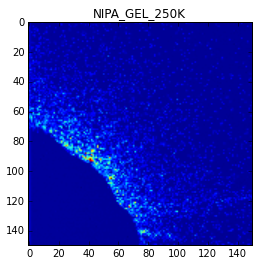

In [2]:
num_levels = 7
num_bufs = 8

img_stack = np.load("100_500_NIPA_GEL.npy")

img_it = np.nditer(img_stack)


plt.imshow(img_stack[0])
plt.title("NIPA_GEL_250K")
plt.show()

##Get the Reqiured ROI's 
### Call skxray.diff_roi_choice.roi_rings_step

In [3]:
q_start = 65
q_width = 9
step_q = (5.0, 4.0)
x_center = 7.
y_center = (129.)
num_qs = 3

# get the edges of the rings
edges = roi.ring_edges(q_start, width=q_width, spacing=step_q,
                         num_rings=num_qs)
# get the label array from the ring shaped 3 region of interests(ROI's)
all_qinds = roi.rings(edges, (y_center, x_center), img_stack.shape[1:])

# extarct the ROI's lables and pixel indices corresponding to those labels
q_inds, pixel_list = corr.extract_label_indices(all_qinds)


##Plot the Reqiured ROI's

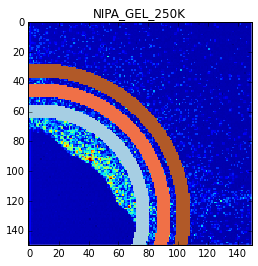

In [4]:
def test_demo(ax, inds, pix_list, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """
    tt = np.zeros(img_dim).ravel() * np.nan
    tt[pix_list] = inds

    im = ax.imshow(image, interpolation='none', norm=LogNorm())
    im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    
    
tt = np.zeros(img_stack.shape[1:]).ravel()
tt[pixel_list] = q_inds

fig, ax = plt.subplots()
plt.title("NIPA_GEL_250K")
test_demo(ax, q_inds, pixel_list, img_stack.shape[1:], img_stack[0])
plt.show()

## Call the skxray.corr.multi_tau_corr

In [5]:
# g2 one time correlation results for 3 ROI's
# lag_staps are delays for multiple tau analysis
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, all_qinds,
                                             img_it)

In [6]:
lag_time = 0.001
lag_step = lag_steps[:g2.shape[0]]
lags = lag_step*lag_time

## Plot the one time corretaion functions

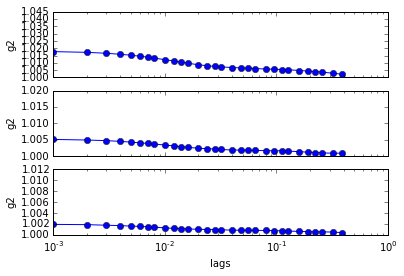

In [11]:
fig, axes = plt.subplots(num_qs, sharex=True)
axes[num_qs-1].set_xlabel("lags")
for i in range(num_qs):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lags, g2[:, i], '-o')
plt.show()
    